In [1]:
import optuna
import subprocess
import json
import shutil
import os
from train import main as train_main

def objective(trial):
    # パラメータの提案
    gamma = trial.suggest_float("gamma", 0.90, 0.99)
    lr = trial.suggest_float("lr", 1e-6, 1e-3, log=True)
    episodes = trial.suggest_int("episodes", 10000, 20000, step=1000)  # 100, 110, 120, ...
    
    # モデルパスの定義
    model_path = f"save_25/model_trial_{trial.number}_lr{lr:.5f}_g{gamma:.3f}.pth"

    # 訓練スタート
    train_main(
        lr=lr,
        gamma=gamma,
        episodes=episodes,
        save_path=model_path  # ←動的に渡す！
    )
    
    # パスを trial に記録
    trial.set_user_attr("model_path", model_path)
    
    # 訓練結果を保存
    result = subprocess.run(["python", "inference.py", model_path], capture_output=True, text=True)
    # デバッグ出力を追加！
    print("STDOUT:\n", result.stdout)
    print("STDERR:\n", result.stderr)

    distance = float(result.stdout.strip())
    return distance

[I 2025-05-23 14:37:56,647] A new study created in memory with name: no-name-988127e1-2a08-4447-9d7f-9c5c38e05f4b


  0%|          | 0/50 [00:00<?, ?it/s]

Episode: 0, Mean: -12.776, Std: 1.625, Min: -17.464910984039307, Max: -9.06778359413147
Episode: 1000, Mean: -7.484, Std: 0.932, Min: -9.895815581083298, Max: -4.733911717077717
Episode: 2000, Mean: -6.970, Std: 0.915, Min: -8.905914336442947, Max: -4.997476186603308
Episode: 3000, Mean: -6.751, Std: 0.960, Min: -9.596591003239155, Max: -4.835357967764139
Episode: 4000, Mean: -6.833, Std: 1.003, Min: -9.710370883345604, Max: -4.786276202648878
Episode: 5000, Mean: -6.780, Std: 1.018, Min: -9.190639108419418, Max: -4.603039620444179
Episode: 6000, Mean: -6.769, Std: 0.998, Min: -9.063539925962687, Max: -4.7070176266133785
Episode: 7000, Mean: -6.763, Std: 1.026, Min: -10.145584098994732, Max: -4.707165289670229
Episode: 8000, Mean: -6.562, Std: 0.958, Min: -8.815072441473603, Max: -4.233051106333733
Episode: 9000, Mean: -6.459, Std: 0.864, Min: -8.991443436592817, Max: -4.448517659679055
Episode: 10000, Mean: -6.538, Std: 0.912, Min: -9.295655731111765, Max: -4.675960501655936
Episode: 

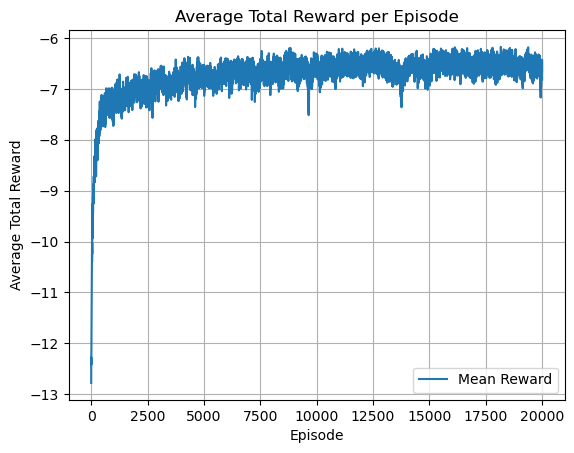

STDOUT:
 6.468539998047054

STDERR:
 /home/iwashiro/tsp/deep-reinforcement-learning-tsp/policy_reinforce_transformer/agent/agent.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental f

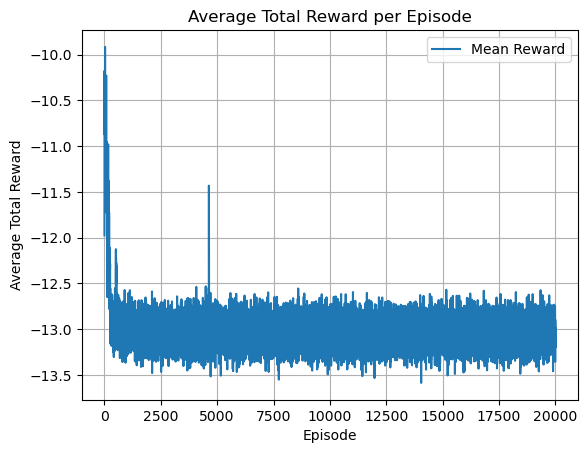

STDOUT:
 11.168875003103167

STDERR:
 /home/iwashiro/tsp/deep-reinforcement-learning-tsp/policy_reinforce_transformer/agent/agent.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental 

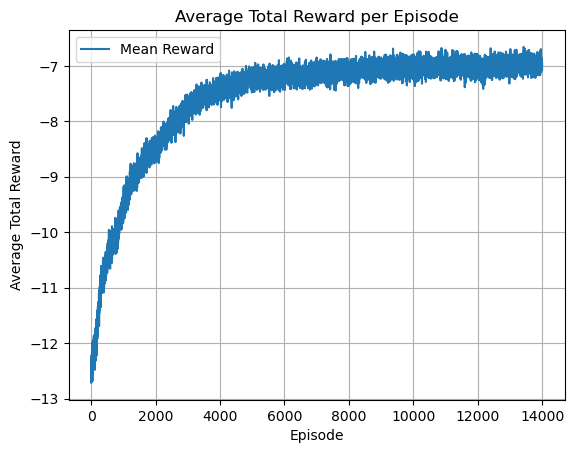

STDOUT:
 6.6659600938260555

STDERR:
 /home/iwashiro/tsp/deep-reinforcement-learning-tsp/policy_reinforce_transformer/agent/agent.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental 

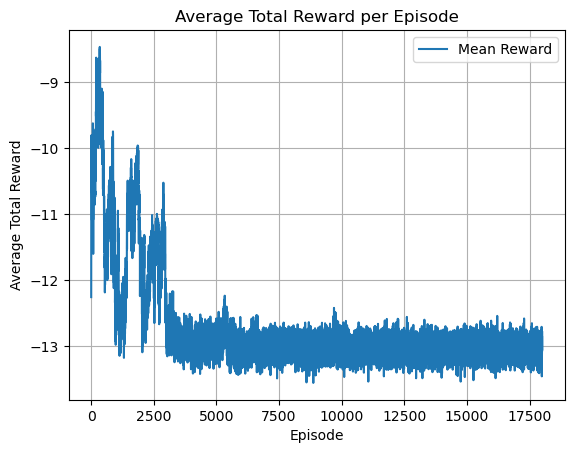

STDOUT:
 12.303930649798364

STDERR:
 /home/iwashiro/tsp/deep-reinforcement-learning-tsp/policy_reinforce_transformer/agent/agent.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental 

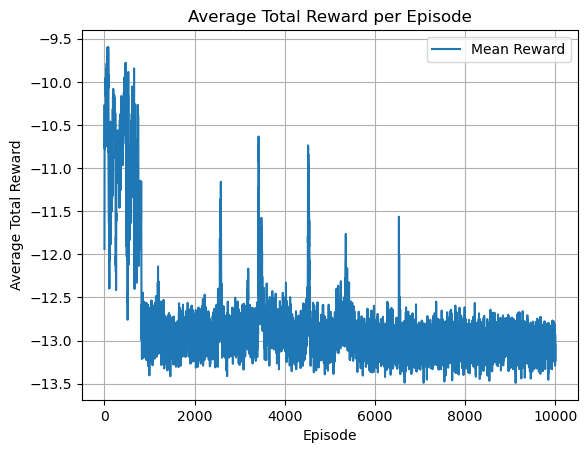

STDOUT:
 14.03829755499214

STDERR:
 /home/iwashiro/tsp/deep-reinforcement-learning-tsp/policy_reinforce_transformer/agent/agent.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental f

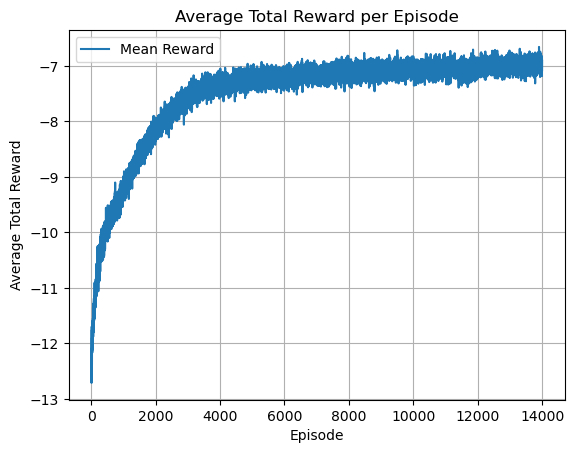

STDOUT:
 6.818048408608884

STDERR:
 /home/iwashiro/tsp/deep-reinforcement-learning-tsp/policy_reinforce_transformer/agent/agent.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental f

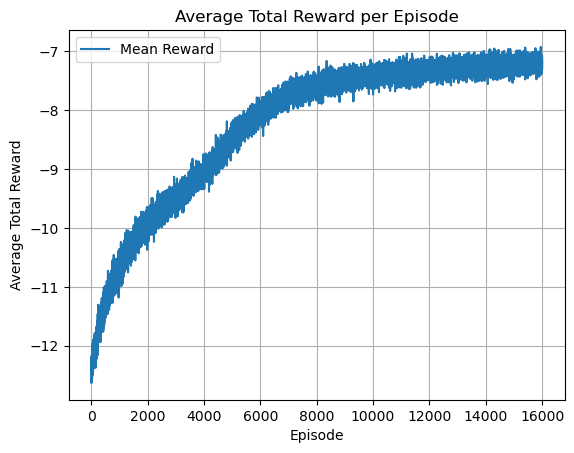

STDOUT:
 6.485554924286902

STDERR:
 /home/iwashiro/tsp/deep-reinforcement-learning-tsp/policy_reinforce_transformer/agent/agent.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental f

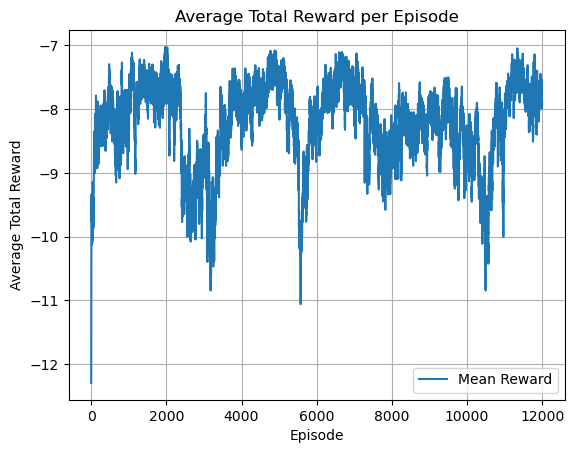

STDOUT:
 9.312588351204992

STDERR:
 /home/iwashiro/tsp/deep-reinforcement-learning-tsp/policy_reinforce_transformer/agent/agent.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental f

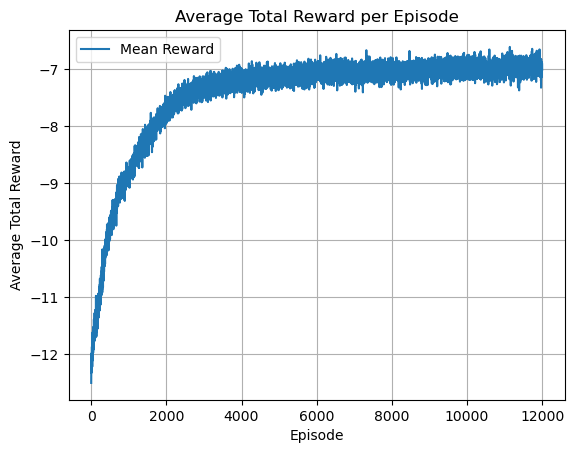

STDOUT:
 6.712370507277548

STDERR:
 /home/iwashiro/tsp/deep-reinforcement-learning-tsp/policy_reinforce_transformer/agent/agent.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental f

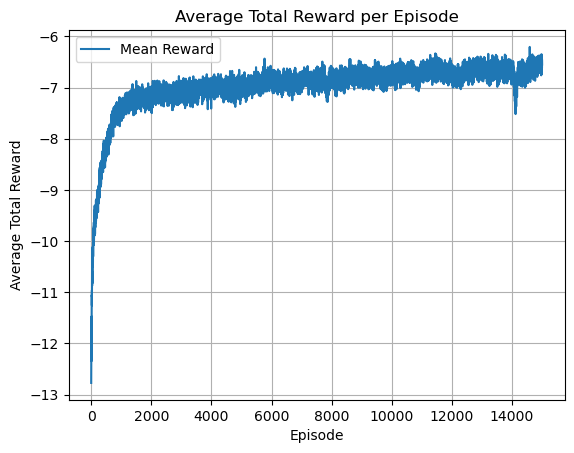

STDOUT:
 6.482028207689524

STDERR:
 /home/iwashiro/tsp/deep-reinforcement-learning-tsp/policy_reinforce_transformer/agent/agent.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental f

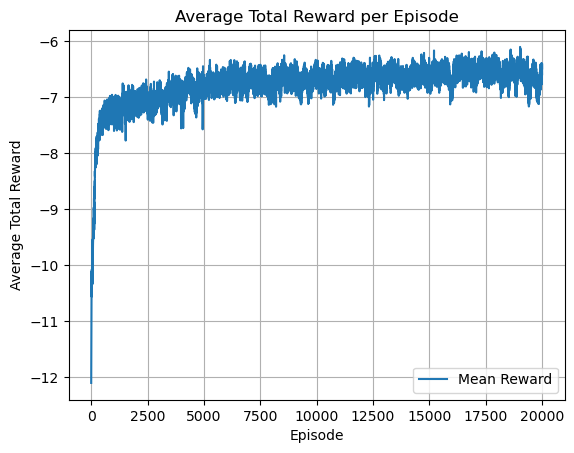

STDOUT:
 6.437686160963029

STDERR:
 /home/iwashiro/tsp/deep-reinforcement-learning-tsp/policy_reinforce_transformer/agent/agent.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental f

In [ ]:
# 最適化開始
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, show_progress_bar=True)
best_model_path = study.best_trial.user_attrs["model_path"]
# 結果表示
print("Best trial:")
print(study.best_trial)
print("Best model path:", best_model_path)

In [ ]:
from inference import main as inference_main

# best モデルでプロットしたい場合
inference_main(best_model_path, episodes=1000, plot=True)

In [ ]:
# from train import main as train_main

# # モデルパスの定義
# model_test_path = f"save/model_test.pth"

# # 訓練スタート
# train_main(
#     lr=0.0001,
#     gamma=0.95,
#     episodes=1,
#     save_path=model_test_path  # ←動的に渡す！
# )

In [ ]:
# from inference import main as inference_main

# # model_test_path = f"save/model_trial_67_lr0.00002_g0.943.pth"

# # best モデルでプロットしたい場合z
# inference_main(model_test_path, episodes=1, plot=True)